# Spaceship Titanic
### Predict which passengers are transported to an alternate dimension

### https://www.kaggle.com/competitions/spaceship-titanic/overview

## -----------------------------------------------S  T  A  R  T--------------------------------------------------------

# #1 : Imorting modules and Start Pre-processing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import scipy

import datetime
import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\sahar\\OneDrive\\Documents\\DataScience_LB\\LB_DSC_Modules\\02_Stats+ML\\02_Stats+ML_16APR_Classes\\Project-2_SpaceshipTitanic'

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import TransformerMixin
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RepeatedKFold
import statsmodels.api as sma
from scipy import stats

In [4]:
# Loading Train Dataset

train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Loading Test Dataset

test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
print('Shape of Train Data: ', train_data.shape)
print('Shape of Test Data: ', test_data.shape)

Shape of Train Data:  (8693, 14)
Shape of Test Data:  (4277, 13)


In [7]:
train_data.replace(to_replace=True, value=1, inplace=True)
train_data.replace(to_replace=False, value=0, inplace=True)

test_data.replace(to_replace=True, value=1, inplace=True)
test_data.replace(to_replace=False, value=0, inplace=True)

In [8]:
# Merging train and Test dataset and separating response variable

train_data = train_data.astype({'Transported': int})
y = pd.DataFrame(train_data.Transported)
train_data.drop(columns='Transported', inplace=True)

dataset = pd.concat([train_data, test_data])

print('Shape of Merged Dataset: ', dataset.shape)
print('Shape of Response Dataframe: ', y.shape)

Shape of Merged Dataset:  (12970, 13)
Shape of Response Dataframe:  (8693, 1)


In [9]:
# Preparing Submission DataFrame and dropping 'Id' from merged dataset

sub_data = pd.DataFrame()
sub_data['PassengerId'] = test_data['PassengerId']

In [10]:
# Checking nos. of Features and Records

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  float64
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  float64
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.4+ MB


In [11]:
dataset.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy


In [12]:
# From data description it appears that Feature 'PassengerId' contains 2 info, namely: Group ID No., &  Heads in the Group
# Splitting the single feature into 2 as below:

dataset[['PassengerId', 'PassengerGr']] = dataset['PassengerId'].str.split('_', expand=True)

In [13]:
# From data description it appears that Feature 'Cabin' contains 3 info, namely: Deck position, Cabin number, & Boarding Side
# Splitting the single feature into 3 as below:

dataset[['Deck', 'Cabin', 'Side']] = dataset['Cabin'].str.split('/', expand=True)

In [14]:
# Dropping Name Variable being arbitary values wrt relatioship among other features

dataset.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

In [15]:
dataset.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGr,Deck,Side
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,01,B,P


In [16]:
# Checking nos. of Features and Records of the dataset

dataset.shape

(12970, 13)

In [17]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGr,Deck,Side
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,01,B,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,01,F,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,01,A,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,02,A,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,01,F,S


# #2 : Handling of Missing Values

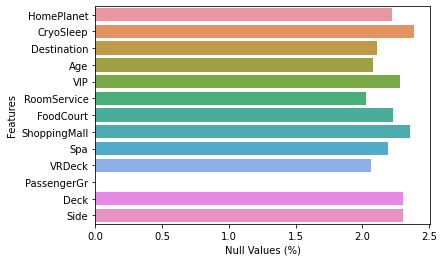

In [18]:
# Percentage of missing value per features

null_list = list(dataset.isnull().sum()/len(dataset)*100)
features = dataset.columns

df_null = pd.DataFrame({'Features': features, 'Null Values (%)': null_list})
sns.barplot(x="Null Values (%)", y='Features', data=df_null)
plt.show()


In [19]:
# Except 1 feature all have missing values, but none of them having missing value more than 25%
# Hence, we need to adopt Imputation Technique to handle those missing values

In [20]:
# Indexing the expense columns

exp_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]

In [21]:
# Those who are on CyroSleep could not spend, hence:

for col in exp_col:
    dataset.loc[dataset['CryoSleep']==0, exp_col] = 0

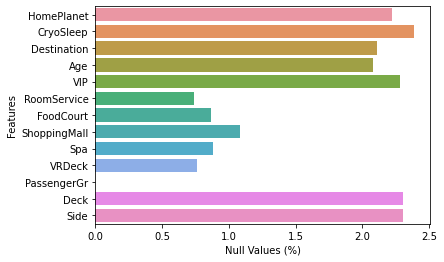

In [22]:
# Percentage of missing value per features

null_list = list(dataset.isnull().sum()/len(dataset)*100)
features = dataset.columns

df_null = pd.DataFrame({'Features': features, 'Null Values (%)': null_list})
sns.barplot(x="Null Values (%)", y='Features', data=df_null)
plt.show()

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  float64
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  float64
 5   RoomService   12874 non-null  float64
 6   FoodCourt     12858 non-null  float64
 7   ShoppingMall  12829 non-null  float64
 8   Spa           12856 non-null  float64
 9   VRDeck        12871 non-null  float64
 10  PassengerGr   12970 non-null  object 
 11  Deck          12671 non-null  object 
 12  Side          12671 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.4+ MB


In [24]:
# Numerical Variables 

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]

In [25]:
# Categorical Variables 

cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'PassengerGr', 'Deck', 'Side' ]

In [26]:
# Value counts Categorical Variable

for col in cat_cols:
    print(dataset[col].value_counts())
    print('#######'*7)

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64
#################################################
0.0    8079
1.0    4581
Name: CryoSleep, dtype: int64
#################################################
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64
#################################################
0.0    12401
1.0      273
Name: VIP, dtype: int64
#################################################
01    9280
02    2135
03     840
04     338
05     184
06     108
07      66
08      19
Name: PassengerGr, dtype: int64
#################################################
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64
#################################################
S    6381
P    6290
Name: Side, dtype: int64
#################################################


In [27]:
# Value counts Categorical Variable

for col in cat_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [28]:
# Replacing null values for Numerical Variables by median

dataset[num_cols] = dataset[num_cols].fillna(dataset[num_cols].median())

In [29]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGr,Deck,Side
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,01,B,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,0.0,0.0,0.0,0.0,0.0,01,F,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,0.0,0.0,0.0,0.0,0.0,01,A,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,0.0,0.0,0.0,0.0,02,A,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,0.0,0.0,0.0,0.0,0.0,01,F,S


In [30]:
dataset.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerGr     0
Deck            0
Side            0
dtype: int64

In [31]:
# Segragating merged dataset into train and test

X_train = dataset[:len(train_data)]
X_test = dataset[len(train_data):]

df_train = X_train.copy()
df_train['Transported'] = y

print('Shape of Train Data (Ind Var): ' ,X_train.shape)
print('Shape of Train Data (Target Var): ', y.shape)
print('Shape of Train Data (Full): ', df_train.shape)
print('####'*7)
print('Shape of Test Data (Ind Var): ', X_test.shape)
print('####'*7)
print('Shape of Merged Dataset (Ind Var): ', dataset.shape)

Shape of Train Data (Ind Var):  (8693, 13)
Shape of Train Data (Target Var):  (8693, 1)
Shape of Train Data (Full):  (8693, 14)
############################
Shape of Test Data (Ind Var):  (4277, 13)
############################
Shape of Merged Dataset (Ind Var):  (12970, 13)


# #2 : Outlier Treatment

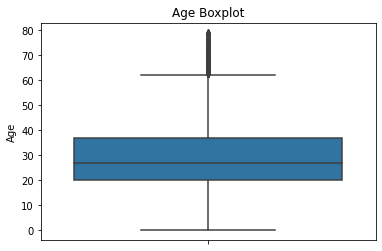

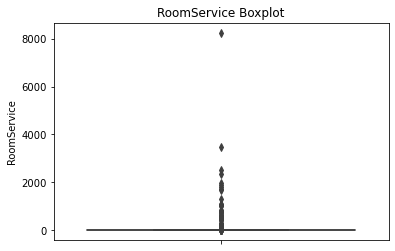

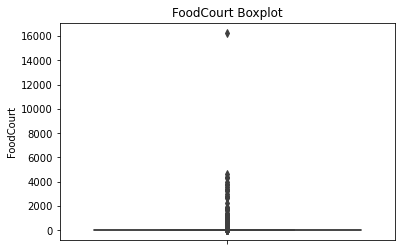

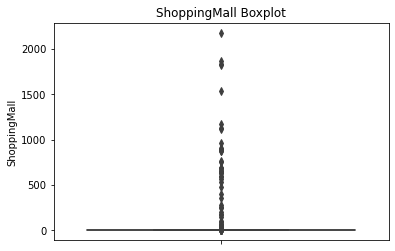

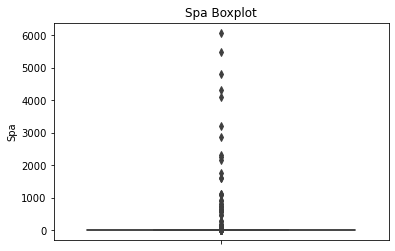

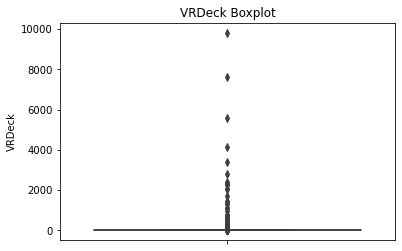

In [32]:
# Box-plot of features --> Dataset: Train Data(Independent Variable)

for i in num_cols:
    
    sns.boxplot(y=i, data=df_train)
    plt.title(i + ' ' + 'Boxplot')

    plt.show()


In [33]:
# We'll not remove outlier 
# This is being classification problem, outlier treatment may loose significant records

# #3: Checking Imbalance in the dataset

In [34]:
y.value_counts()

Transported
1              4378
0              4315
dtype: int64

In [35]:
# It seems its a balance dataset

# #4: Exploratory Data Analysis

# #4a. Categorical Feature Analysis

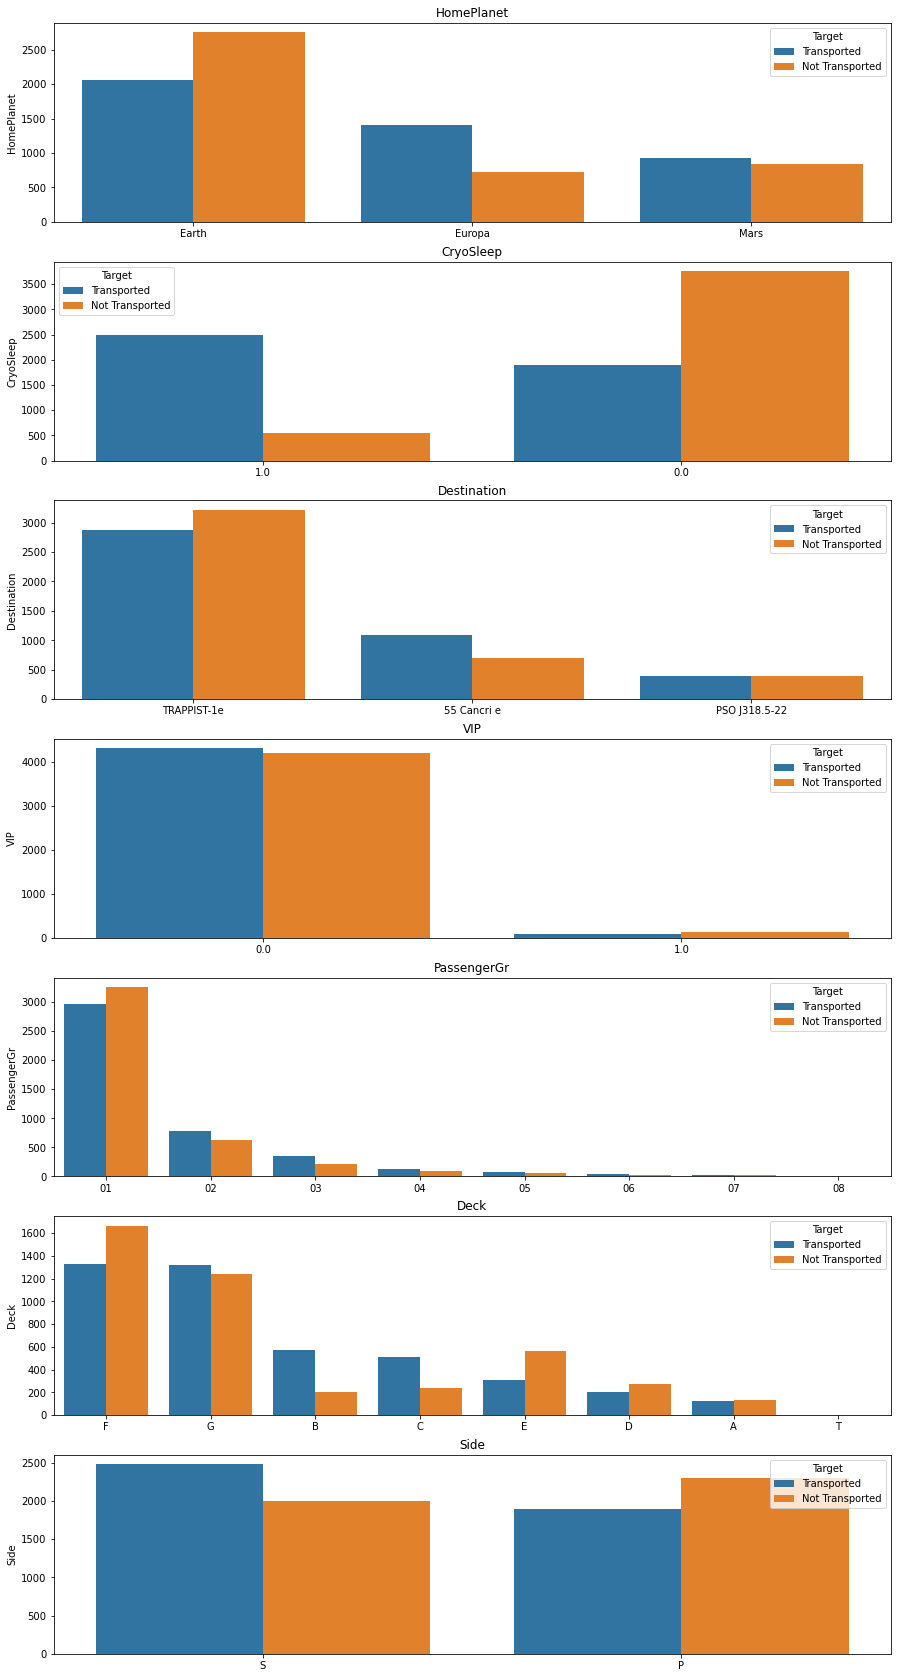

In [36]:
# Visualizing distribution of categorical variables against Response Levels

plt.subplots(7, 1, figsize=(15,30))

for i, col in enumerate(cat_cols):
    plt.subplot(7, 1, i+1)
    df_train_1 = df_train.loc[df_train['Transported']==1, col].value_counts().to_frame()
    df_train_1['Target'] = 'Transported'
    df_train_0 = df_train.loc[df_train['Transported']==0, col].value_counts().to_frame()
    df_train_0['Target'] = 'Not Transported'
    df_transported = pd.concat([df_train_1, df_train_0])
    df_transported.index = map(str, df_transported.index)
    sns.barplot(data=df_transported, x=df_transported.index, y=col, hue='Target')
    plt.title(col)

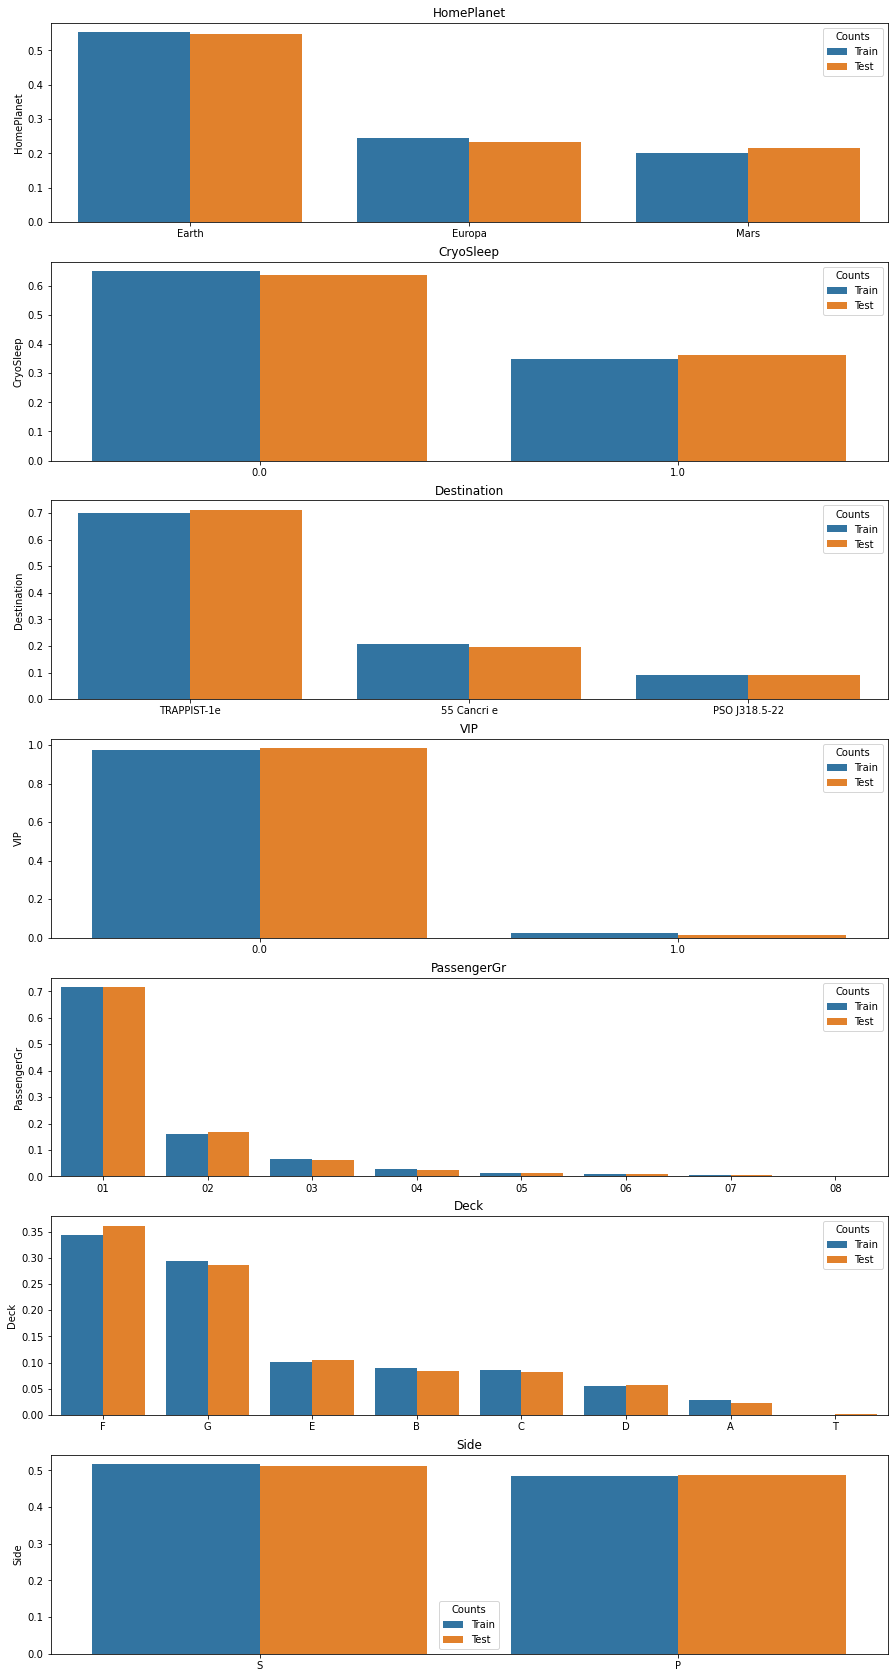

In [37]:
# Visualizing distribution of Categorical Variable in Train & Test Dataset

plt.subplots(7, 1, figsize=(15,30))

for i, col in enumerate(cat_cols):
    plt.subplot(7, 1, i+1)
    df_train_var = X_train[col].value_counts().to_frame() / len(X_train)
    df_train_var['Counts'] = 'Train'
    df_test_var = X_test[col].value_counts().to_frame() / len(X_test)
    df_test_var['Counts'] = 'Test'
    df_var_counts = pd.concat([df_train_var, df_test_var])
    df_var_counts.index = map(str, df_var_counts.index)
    sns.barplot(data=df_var_counts, x=df_var_counts.index, y=col, hue='Counts')
    plt.title(col)    

# #4b. Numerical Feature Analysis

In [38]:
dataset['TotalExp'] = dataset[exp_col].sum(axis=1)
exp_col.append('TotalExp')
num_cols.append('TotalExp')

In [39]:
# We've added one variable hence we need to re-create the datasets

X_train = dataset[:len(train_data)]
X_test = dataset[len(train_data):]

df_train = X_train.copy()
df_train['Transported'] = y

print('Shape of Train Data (Ind Var): ' ,X_train.shape)
print('Shape of Train Data (Target Var): ', y.shape)
print('Shape of Train Data (Full): ', df_train.shape)
print('####'*7)
print('Shape of Test Data (Ind Var): ', X_test.shape)
print('####'*7)
print('Shape of Merged Dataset (Ind Var): ', dataset.shape)

Shape of Train Data (Ind Var):  (8693, 14)
Shape of Train Data (Target Var):  (8693, 1)
Shape of Train Data (Full):  (8693, 15)
############################
Shape of Test Data (Ind Var):  (4277, 14)
############################
Shape of Merged Dataset (Ind Var):  (12970, 14)


In [40]:
dataset[num_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.735081,5.386507,9.767309,3.489746,7.613261,6.740324,32.997147
std,14.238958,111.628457,205.290583,69.090701,216.270230,159.478003,432.518449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,8243.000000,16263.000000,4471.000000,19844.000000,9811.000000,20487.000000


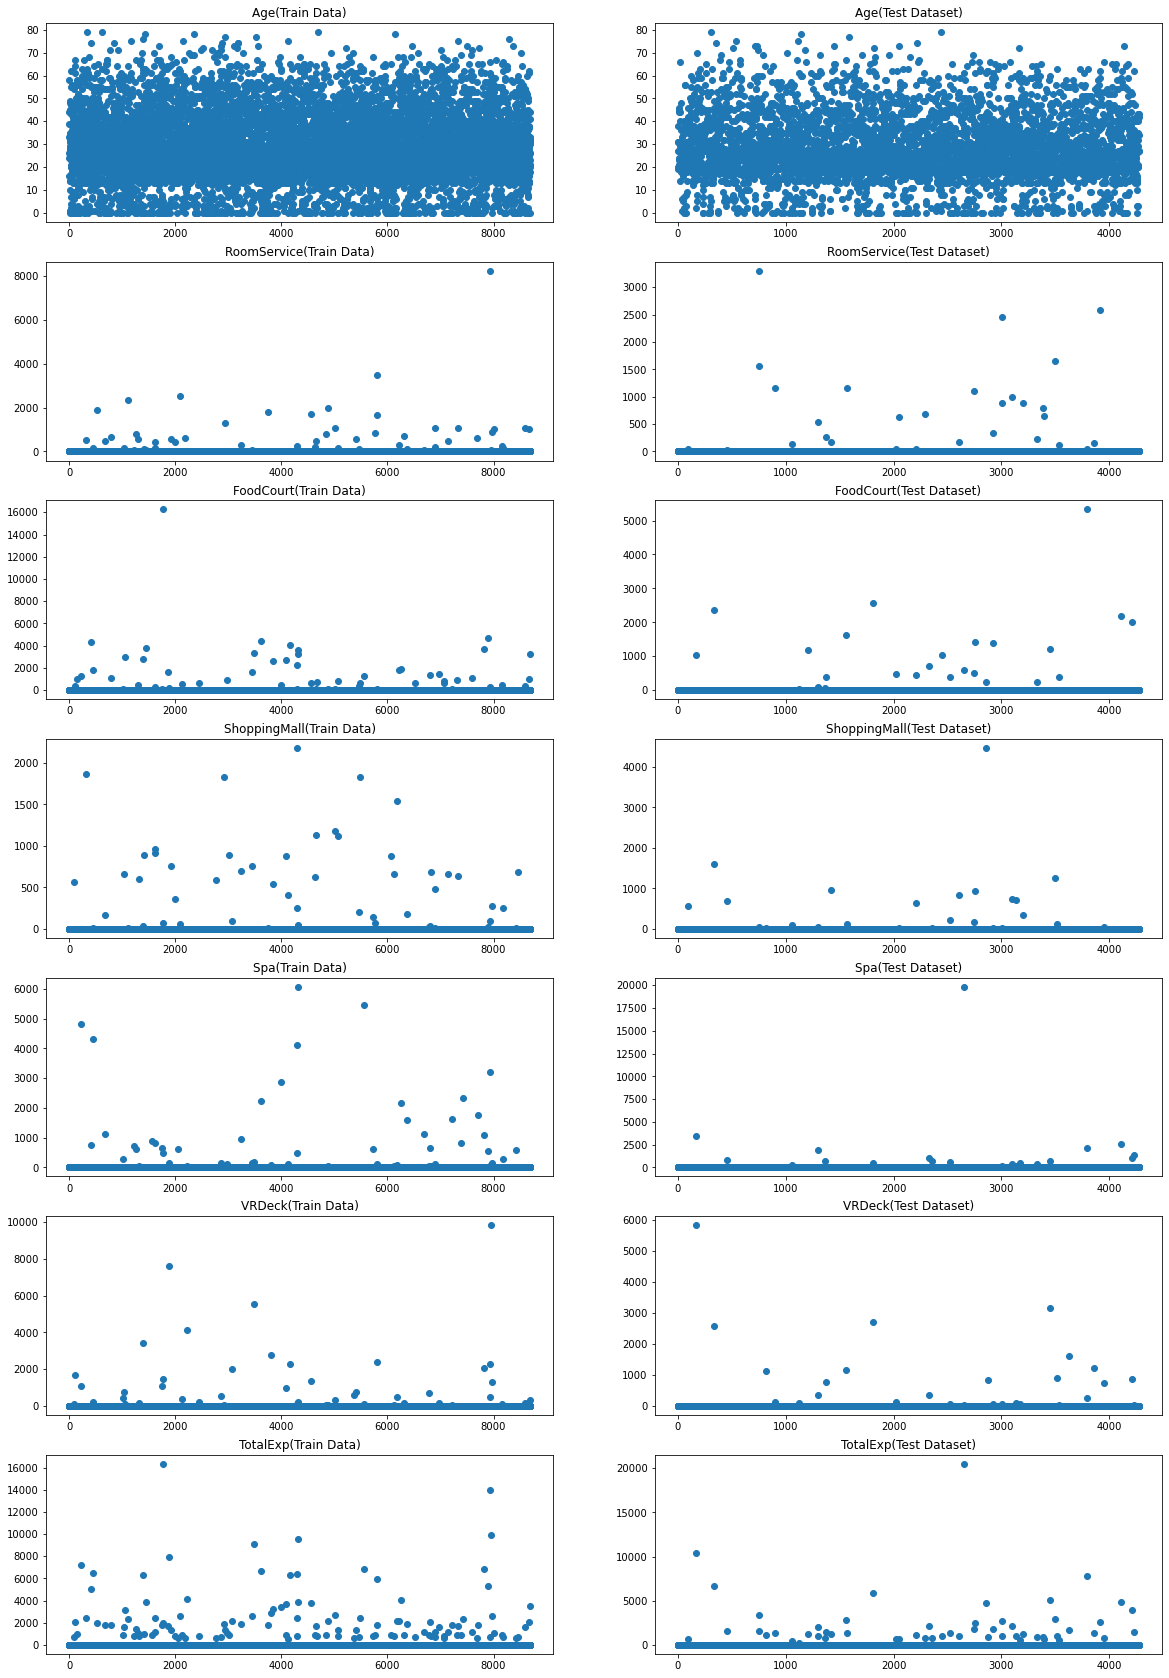

In [41]:
# Visualizing Numeric Columns for Train Data

plt.subplots(7, 2, figsize=(20, 30))

for i, col in enumerate(num_cols):
    plt.subplot(7, 2, 2*i+1)
    plt.scatter(y=X_train[col], x=X_train.index)
    plt.title(col + '(Train Data)')
    
    plt.subplot(7, 2, 2*i+2)
    plt.scatter(y=X_test[col], x=X_test.index)
    plt.title(col + '(Test Dataset)')

In [42]:
# From above observation we can cap some data, such as:
dataset.Spa
dataset.loc[dataset['RoomService']>4000, 'RoomService'] = 4000
dataset.loc[dataset['FoodCourt']>6000, 'FoodCourt'] = 6000
dataset.loc[dataset['ShoppingMall']>2500, 'ShoppingMall'] = 2500
dataset.loc[dataset['Spa']>6000, 'Spa'] = 6000

In [43]:
# We've altered some features hence we need to re-create the datasets

X_train = dataset[:len(train_data)]
X_test = dataset[len(train_data):]

df_train = X_train.copy()
df_train['Transported'] = y

print('Shape of Train Data (Ind Var): ' ,X_train.shape)
print('Shape of Train Data (Target Var): ', y.shape)
print('Shape of Train Data (Full): ', df_train.shape)
print('####'*7)
print('Shape of Test Data (Ind Var): ', X_test.shape)
print('####'*7)
print('Shape of Merged Dataset (Ind Var): ', dataset.shape)

Shape of Train Data (Ind Var):  (8693, 14)
Shape of Train Data (Target Var):  (8693, 1)
Shape of Train Data (Full):  (8693, 15)
############################
Shape of Test Data (Ind Var):  (4277, 14)
############################
Shape of Merged Dataset (Ind Var):  (12970, 14)


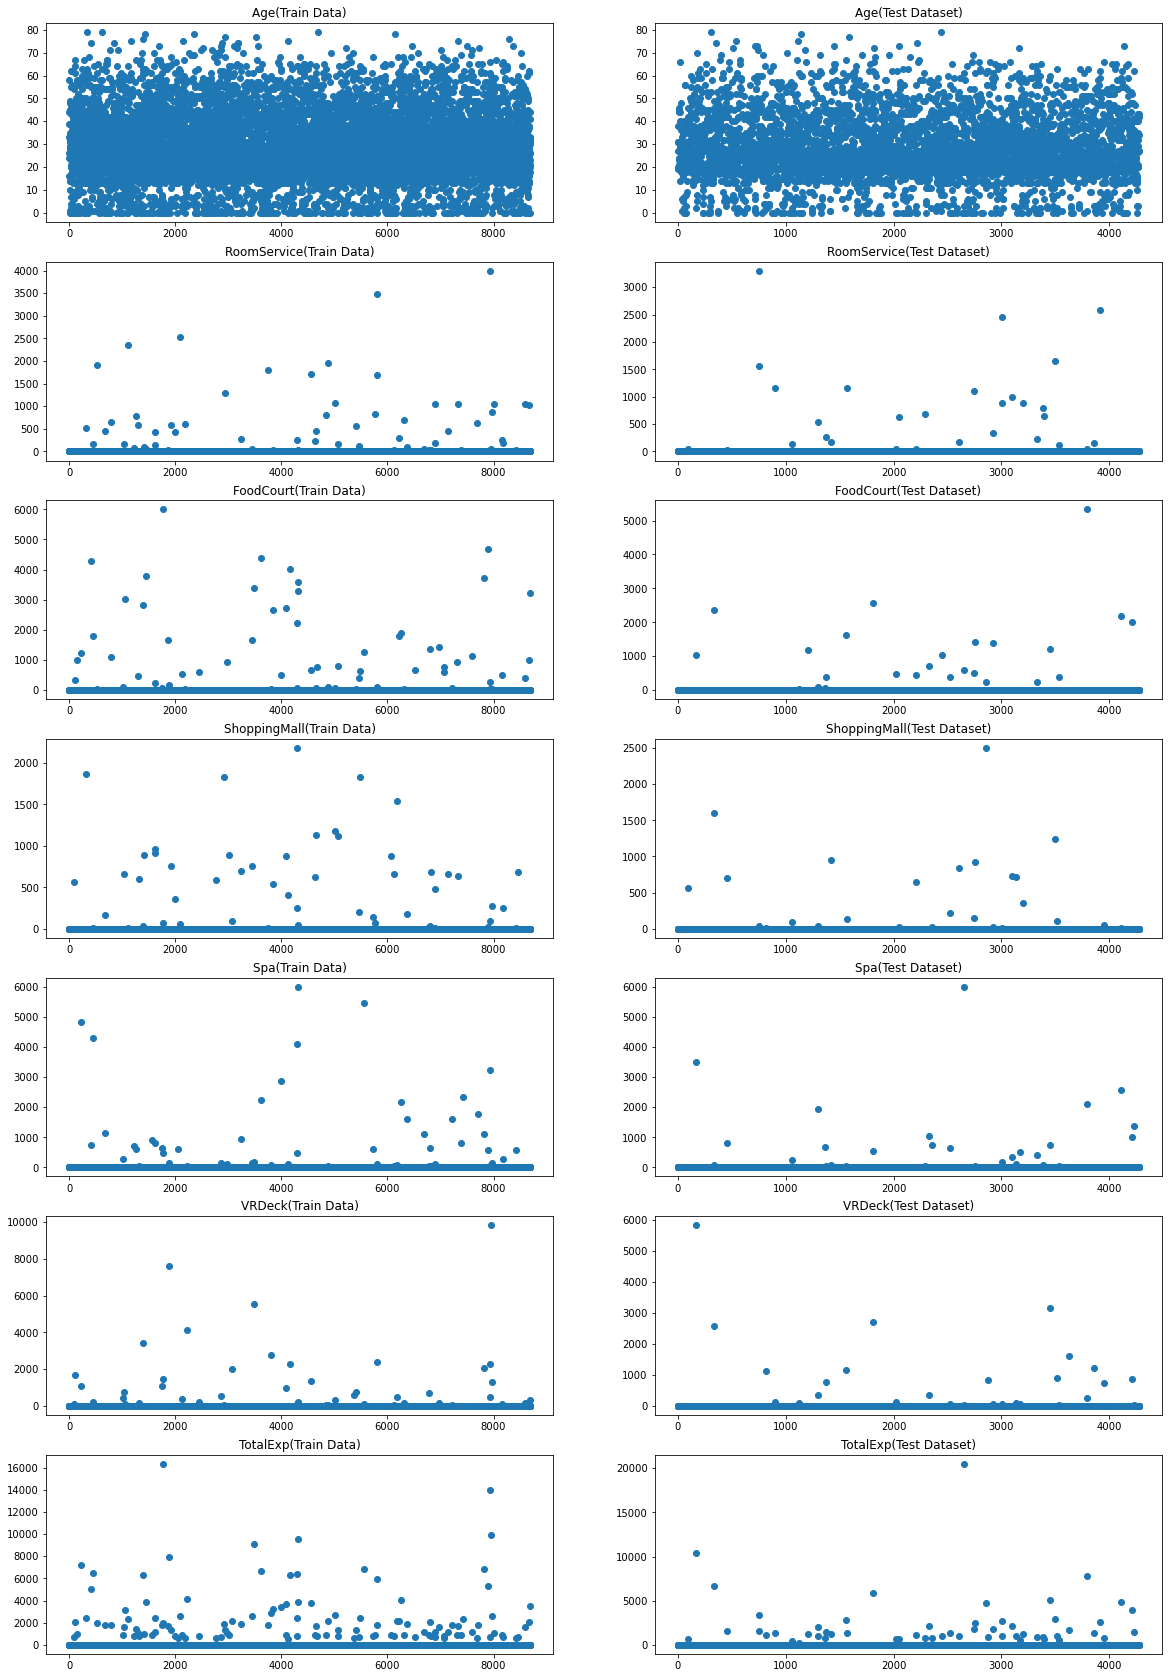

In [44]:
# Visualizing Numeric Columns for Train Data

plt.subplots(7, 2, figsize=(20, 30))

for i, col in enumerate(num_cols):
    plt.subplot(7, 2, 2*i+1)
    plt.scatter(y=X_train[col], x=X_train.index)
    plt.title(col + '(Train Data)')
    
    plt.subplot(7, 2, 2*i+2)
    plt.scatter(y=X_test[col], x=X_test.index)
    plt.title(col + '(Test Dataset)')

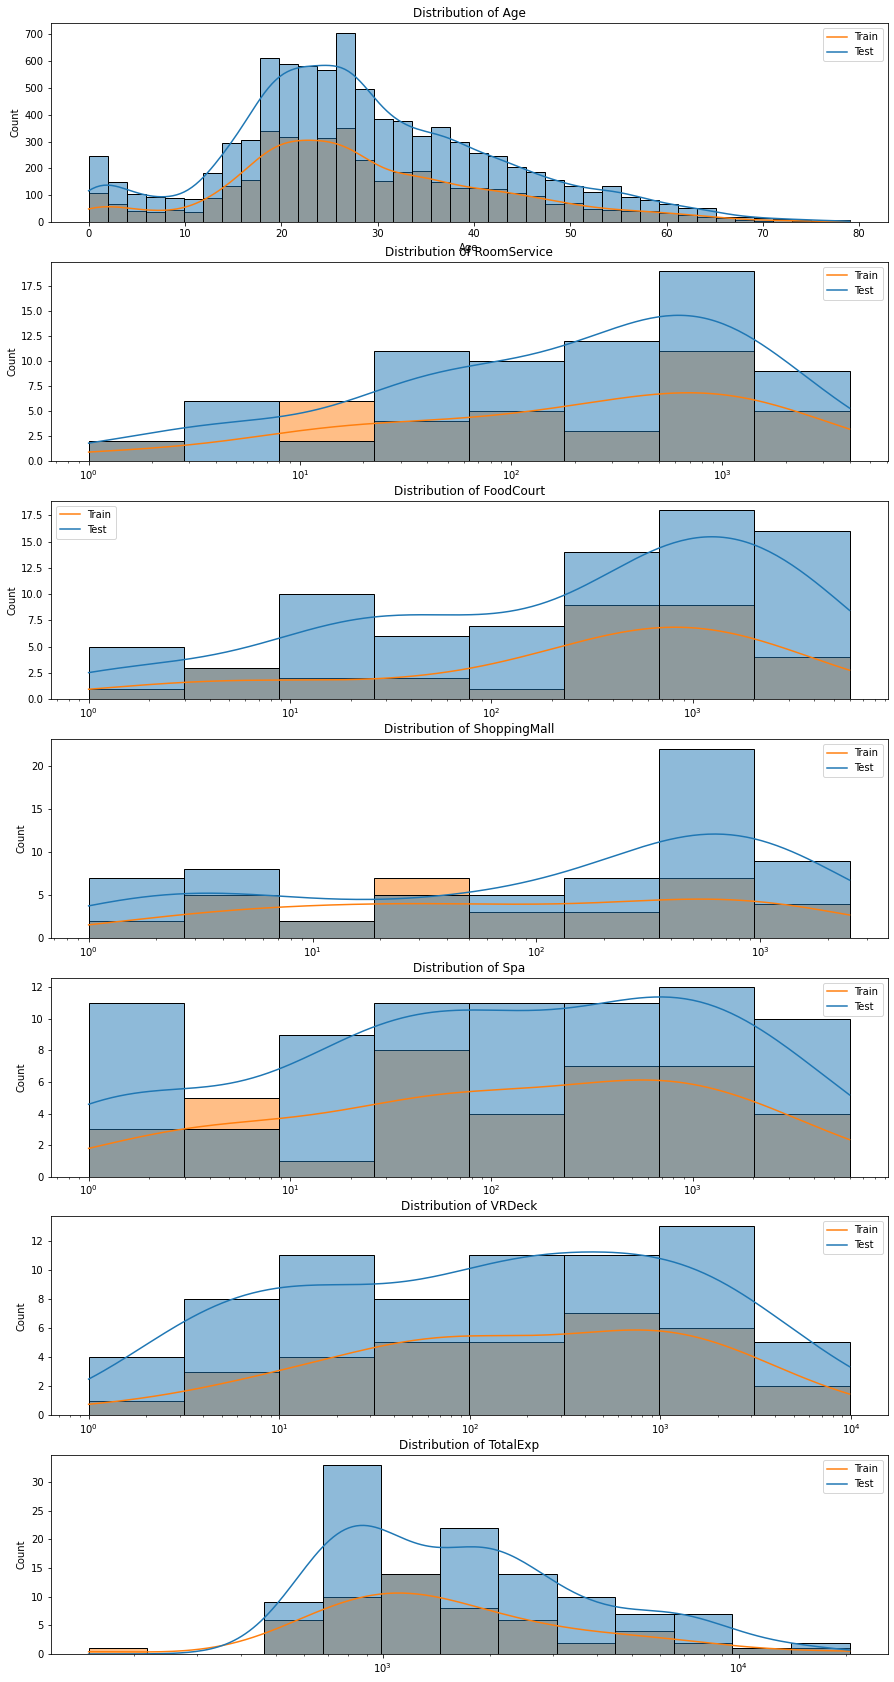

In [45]:
# Visualizing Train and Test Data for numerical Columns

plt.subplots(7, 1, figsize=(15, 30))

for i, col in enumerate(num_cols):
    plt.subplot(7, 1, i+1)
    log_scale = (i > 0) * 10
    col_data = pd.concat([X_train[col], X_test[col]], axis=1, ignore_index=True)  
    if log_scale:
        col_data.replace({0: np.nan}, inplace=True)
        sns.histplot(data=col_data, kde=True, log_scale=log_scale)
    else:
        sns.histplot(data=col_data, kde=True, bins=40)
        plt.xlabel(col)
    plt.legend(['Train', 'Test'])
    plt.title('Distribution of ' + col)


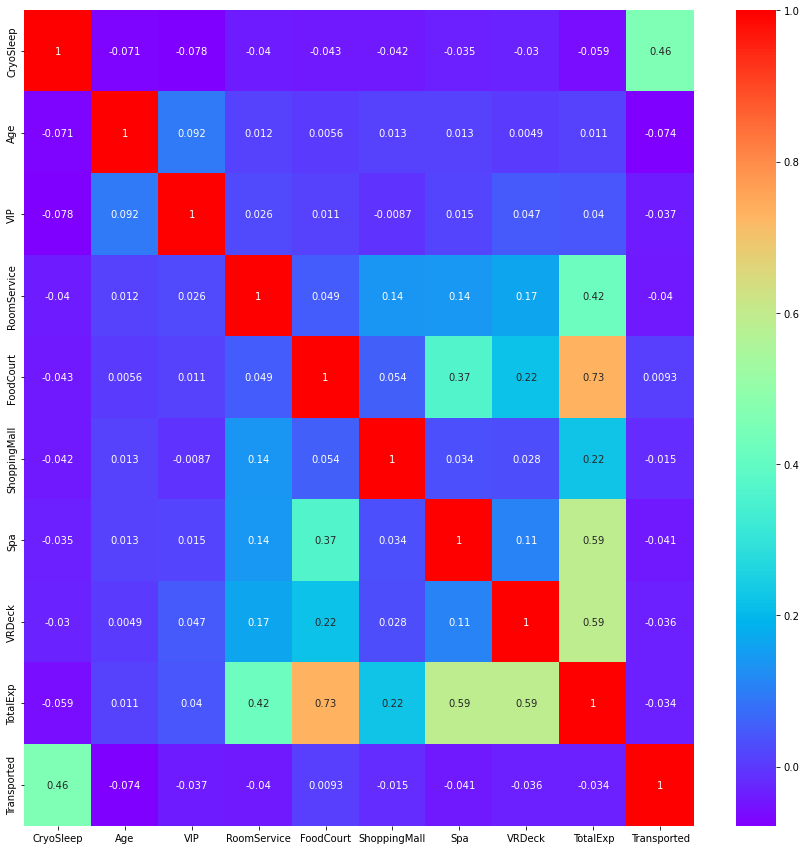

In [46]:
# Checking Correlation for the 

corr_matrix = df_train.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.show()

# #5:Transformation of Numerical Features

In [47]:
# Transformation of Expenses Features

In [48]:
_num_cols_logs = []
for col in num_cols:
    feature = col + '_' + 'log'
    dataset[feature] = np.log10(dataset[col] + 1)
    dataset.drop(columns=col, axis=1, inplace=True)
    _num_cols_logs.append(feature)

num_cols.clear()
num_cols = _num_cols_logs
del _num_cols_logs
print(num_cols)
dataset.head()

['Age_log', 'RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log', 'TotalExp_log']


,HomePlanet,CryoSleep,Destination,VIP,PassengerGr,Deck,Side,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log
0,Europa,0.0,TRAPPIST-1e,0.0,01,B,P,1.602060,0.0,0.0,0.0,0.0,0.0,0.0
1,Earth,0.0,TRAPPIST-1e,0.0,01,F,S,1.397940,0.0,0.0,0.0,0.0,0.0,0.0
2,Europa,0.0,TRAPPIST-1e,1.0,01,A,S,1.770852,0.0,0.0,0.0,0.0,0.0,0.0
3,Europa,0.0,TRAPPIST-1e,0.0,02,A,S,1.531479,0.0,0.0,0.0,0.0,0.0,0.0
4,Earth,0.0,TRAPPIST-1e,0.0,01,F,S,1.230449,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# We've altered some features hence we need to re-create the datasets

X_train = dataset[:len(train_data)]
X_test = dataset[len(train_data):]

df_train = X_train.copy()
df_train['Transported'] = y

print('Shape of Train Data (Ind Var): ' ,X_train.shape)
print('Shape of Train Data (Target Var): ', y.shape)
print('Shape of Train Data (Full): ', df_train.shape)
print('####'*7)
print('Shape of Test Data (Ind Var): ', X_test.shape)
print('####'*7)
print('Shape of Merged Dataset (Ind Var): ', dataset.shape)

Shape of Train Data (Ind Var):  (8693, 14)
Shape of Train Data (Target Var):  (8693, 1)
Shape of Train Data (Full):  (8693, 15)
############################
Shape of Test Data (Ind Var):  (4277, 14)
############################
Shape of Merged Dataset (Ind Var):  (12970, 14)


In [50]:
dataset[num_cols].describe()

,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,1.396556,0.018604,0.020484,0.015180,0.018682,0.017404,0.043211
std,0.318404,0.218244,0.238914,0.193233,0.217926,0.211569,0.372870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.322219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.447158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.579784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.903090,3.602169,3.778224,3.398114,3.778224,3.991758,4.311500


In [51]:
dataset.head()

,HomePlanet,CryoSleep,Destination,VIP,PassengerGr,Deck,Side,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log
0,Europa,0.0,TRAPPIST-1e,0.0,01,B,P,1.602060,0.0,0.0,0.0,0.0,0.0,0.0
1,Earth,0.0,TRAPPIST-1e,0.0,01,F,S,1.397940,0.0,0.0,0.0,0.0,0.0,0.0
2,Europa,0.0,TRAPPIST-1e,1.0,01,A,S,1.770852,0.0,0.0,0.0,0.0,0.0,0.0
3,Europa,0.0,TRAPPIST-1e,0.0,02,A,S,1.531479,0.0,0.0,0.0,0.0,0.0,0.0
4,Earth,0.0,TRAPPIST-1e,0.0,01,F,S,1.230449,0.0,0.0,0.0,0.0,0.0,0.0


# #6: Encoding of Categorical Variables

### KFold Mean Target Encoding Implementation

class KFoldTargetEncoder(TransformerMixin):
    
    def __init__(self, col_names, n_folds=10, smooth=0):
        self.col_names = col_names
        self.n_folds = n_folds
        self.smooth = smooth
        self.replaces = {}
        
    def fit(self, X, y):
        self.global_mean = y.mean()
        X = X.copy()
        local_means = {}
        
        for col_name in self.col_names:
            local_means[col_name] = pd.DataFrame(index=pd.unique(X[col_name]))
            
        kf = KFold(self.n_folds, shuffle=True)
        for train_ind, _ in kf.split(X):
            X_train = X.iloc[train_ind]
            y_train = y.iloc[train_ind]
            for col_name in self.col_names:
                local_mean = y_train.groupby(X_train[col_name]).mean()
                local_means[col_name] = pd.concat([local_means[col_name], local_mean], axis=1)
            
        for col_name in self.col_names:
            local_means[col_name].fillna(self.global_mean, inplace=True)
            self.replaces[col_name] = (local_means[col_name].mean(axis=1) * X[col_name].value_counts() +
                                       self.smooth * self.global_mean) / (X[col_name].value_counts() + self.smooth)
        
        return self
        
    def transform(self, X):
        X = X.copy()
        for col_name in self.col_names:
            new_col_name = col_name + '_encoded'
            X[new_col_name] = X[col_name].map(
                lambda x: self.replaces[col_name][x] if x in self.replaces[col_name] else self.global_mean)  
            X[new_col_name].fillna(self.global_mean, inplace=True)
            X.drop(col_name, axis=1, inplace=True)
        return X  

X = X_train.copy()
X.head()

y.mean()

kf = KFold(5, shuffle=True)

_1 = kf.split(X)

_1

In [52]:
# Creating dummy varibles for :

for col in cat_cols:
    dataset[col] = dataset[col].astype('category')
    dataset[col] = dataset[col].cat.codes
    
dataset.head(20)

,HomePlanet,CryoSleep,Destination,VIP,PassengerGr,Deck,Side,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log
0,1,0,2,0,0,1,0,1.602060,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,0,0,5,1,1.397940,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,2,1,0,0,1,1.770852,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,0,1,0,1,1.531479,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2,0,0,5,1,1.230449,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,1,0,0,5,0,1.653213,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,2,0,0,5,1,1.431364,0.0,0.0,0.0,0.0,0.0,0.0
7,0,1,2,0,1,6,1,1.462398,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,2,0,0,5,1,1.556303,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,0,0,0,1,0,1.176091,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
dataset_encoded = pd.get_dummies(data=dataset, columns=cat_cols)

In [54]:
dataset_encoded.head()

,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log,HomePlanet_0,HomePlanet_1,HomePlanet_2,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
0,1.602060,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1.397940,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.770852,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.531479,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1.230449,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [56]:
dataset_encoded.shape

(12970, 35)

encode_var = ['HomePlanet', 'Destination', 'PassengerGr', 'Deck', 'Side']

encoder = KFoldTargetEncoder(encode_var)

encoder.fit(X_train, y)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

local_mean = y_train.groupby(X_train[col_name]).mean()


dataset_encoded.head()

!pip install category_encoders

from category_encoders import TargetEncoder

target_encoder = TargetEncoder(cols=cat_cols, return_df=True, smoothing=1.0)

X_train_encoded = target_encoder.fit_transform(X_train, y)
X_test_encoded = target_encoder.transform(X_test)

print(X_train_encoded.shape)
print(y.shape)
print(X_test_encoded.shape)
print(X_train.shape)
print(X_test.shape)

X_train_encoded.head()

X_train_encoded.reset_index()
X_test_encoded.reset_index()
dataset_encoded = pd.concat([X_train_encoded, X_test_encoded])

X_test_encoded.head()

print(dataset.shape)
print(dataset_encoded.shape)

In [57]:
dataset_encoded.tail()

,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log,HomePlanet_0,HomePlanet_1,HomePlanet_2,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
4272,1.544068,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4273,1.633468,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4274,1.447158,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4275,1.447158,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4276,1.643453,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# #7: Feature Scaling

In [59]:
scaler = MinMaxScaler((-1, 1))
_dataset_num = dataset_encoded[num_cols]
_dataset_num_scaled = pd.DataFrame(scaler.fit_transform(_dataset_num), columns=num_cols)

_dataset_num_scaled.head()

,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log
0,0.683641,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.469127,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.861028,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.609466,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.293106,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [60]:
dataset_encoded.drop(columns=num_cols, axis=1, inplace=True)
dataset_scaled = dataset_encoded

for col in num_cols:
    dataset_scaled[col] = _dataset_num_scaled[col]
    
dataset_scaled.head()

,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2,VIP_0,VIP_1,...,Deck_7,Side_0,Side_1,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,TotalExp_log
0,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0.683641,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,0,0,1,0,0,0,1,1,0,...,0,0,1,0.469127,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0.861028,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0,1,0,1,0,0,0,1,1,0,...,0,0,1,0.609466,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,0,0,1,0,0,0,1,1,0,...,0,0,1,0.293106,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [61]:
# We've encoded the categorical and scaled the numerical variables hence we need to re-create the datasets

X_train = dataset_scaled[:len(train_data)]
X_test = dataset_scaled[len(train_data):]

df_train = X_train.copy()
df_train['Transported'] = y

print('Shape of Train Data (Ind Var): ' ,X_train.shape)
print('Shape of Train Data (Target Var): ', y.shape)
print('Shape of Train Data (Full): ', df_train.shape)
print('####'*7)
print('Shape of Test Data (Ind Var): ', X_test.shape)
print('####'*7)
print('Shape of Merged Dataset (Ind Var): ', dataset.shape)

Shape of Train Data (Ind Var):  (8693, 35)
Shape of Train Data (Target Var):  (8693, 1)
Shape of Train Data (Full):  (8693, 36)
############################
Shape of Test Data (Ind Var):  (4277, 35)
############################
Shape of Merged Dataset (Ind Var):  (12970, 14)


In [62]:
del dataset_encoded, dataset_scaled,
del _dataset_num, _dataset_num_scaled 
del null_list, df_null, df_train, num_cols, cat_cols, exp_col

NameError: name 'dataset_test' is not defined

# Pre-processing part completed

## Applying PCA

pca = PCA(0.95)
dataset_pca = pca.fit_transform(dataset)

print(dataset.shape)
print(dataset_pca.shape)

pd.DataFrame(dataset_pca).head()

# Segregating Train & Test dataset

X_train = dataset_scaled[:len(train_data)]
X_test = dataset_scaled[len(train_data):]

print('Shape of X_Train:', X_train.shape)
print('Shape of y:', y.shape)
print('===='*7)
print('Shape of X_Test:', X_test.shape)

# #9: Model Building

In [56]:
# Prepraing K-Fold, which we'll use in Model Building

In [63]:
kf_inner = KFold(n_splits=5, shuffle=True, random_state=787)
#kf_outer = KFold(n_splits=10, shuffle=True, random_state=787)
kf_outer = RepeatedKFold(n_splits=10, n_repeats=5, random_state=787)

## Building Logistic Regression Model

In [65]:
%%time

model_logit = LogisticRegression(warm_start=True, random_state=787)
param = dict() 
param['penalty']=['l1', 'l2', 'elasticnet', 'none']
param['C'] = [0.1, 0.5, 1, 2]
param['max_iter']=[100, 200, 500]
param['solver']=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

search = GridSearchCV(model_logit, param, scoring='accuracy', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)

print('===='*7)
print(f'Best {type(model_logit).__name__} Parameter(s): {result.best_params_}')
print('===='*7)

scores = cross_val_score(model_logit, X_train, y, cv=kf_outer, scoring='accuracy')
accuracy_LR = scores.mean()

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s Model]" % (scores.mean(), scores.std(), type(model_logit).__name__))
print('===='*7)

Best LogisticRegression Parameter(s): {'C': 0.5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Model Accuracy: 0.73229 (+/- 0.015) [for LogisticRegression Model]
Wall time: 5min 22s


## Building KNN Model

In [66]:
%%time

model_knn = KNeighborsClassifier()
param = dict()
param['n_neighbors'] = [5, 8, 10, 12]
param['weights']=['uniform', 'distance']
param['algorithm']=['auto', 'ball_tree', 'kd_tree', 'brute']
param['metric']=['minkowski', 'euclidean', 'manhattan']

search = GridSearchCV(model_knn, param, scoring='accuracy', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)

print('===='*7)
print(f'Best {type(model_knn).__name__} Parameter(s): {result.best_params_}')
print('===='*7)

scores = cross_val_score(model_knn, X_train, y, cv=kf_outer, scoring='accuracy')
accuracy_KNN = scores.mean()

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s Model]" % (scores.mean(), scores.std(), type(model_knn).__name__))
print('===='*7)

Best KNeighborsClassifier Parameter(s): {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
Model Accuracy: 0.70098 (+/- 0.014) [for KNeighborsClassifier Model]
Wall time: 4min 45s


## Building Random Forest Model

In [67]:
%%time

model_rfc = RandomForestClassifier(warm_start=True, random_state=787)
param = dict()
param['criterion']=['gini', 'entropy']
param['n_estimators'] = [100, 200, 500]
param['max_features']=[1, 2, 5, 8]
param['max_depth']=[4, 5, 6, 8]

search = GridSearchCV(model_rfc, param, scoring='accuracy', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)

print('===='*7)
print(f'Best {type(model_rfc).__name__} Parameter(s): {result.best_params_}')
print('===='*7)

scores = cross_val_score(model_rfc, X_train, y, cv=kf_outer, scoring='accuracy')
accuracy_RF = scores.mean()

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s Model]" % (scores.mean(), scores.std(), type(model_rfc).__name__))
print('===='*7)

Best RandomForestClassifier Parameter(s): {'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'n_estimators': 200}
Model Accuracy: 0.69612 (+/- 0.014) [for RandomForestClassifier Model]
Wall time: 20min 1s


## Building XGBoost Classifier Model

In [69]:
%%time

model_xgb = XGBClassifier(random_state=787)
param = dict()
param['n_estimators'] = [100, 200]
param['learning_rate']=[0.1, 0.05, 0.01]
param['gamma']=[0.2, 0.3, 0.4]
param['min_child_weight']=[0.2, 0.3, 0.4]

search = GridSearchCV(model_xgb, param, scoring='accuracy', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)

print('===='*7)
print(f'Best {type(model_xgb).__name__} Parameter(s): {result.best_params_}')
print('===='*7)

scores = cross_val_score(model_xgb, X_train, y, cv=kf_outer, scoring='accuracy')

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s Model]" % (scores.mean(), scores.std(), type(model_xgb).__name__))
print('===='*7)

Best XGBClassifier Parameter(s): {'gamma': 0.3, 'learning_rate': 0.05, 'min_child_weight': 0.3, 'n_estimators': 100}
Model Accuracy: 0.73533 (+/- 0.014) [for XGBClassifier Model]
Wall time: 4min 55s


## Building Bagging Classifier by XGBoost

In [70]:
%%time

bag_xgb = BaggingClassifier(base_estimator=model_xgb, n_estimators=100, max_samples=0.8, 
                              bootstrap=True, oob_score=True, random_state=787)

scores = cross_val_score(bag_xgb, X_train, y, cv=kf_outer, scoring='accuracy')

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s]" % (scores.mean(), scores.std(), type(bag_xgb).__name__))
print('===='*7)

Model Accuracy: 0.73733 (+/- 0.014) [for BaggingClassifier]
Wall time: 1d 5h 59s


## Building SVM Classifier Model

In [71]:
%%time

model_svc = SVC(random_state=787)
param = dict()
param['C'] = [0.1, 1, 100, 1000]
param['kernel']=['linear', 'rbf', 'sigmoid']

search = GridSearchCV(model_svc, param, scoring='accuracy', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)

print('===='*7)
print(f'Best {type(model_svc).__name__} Parameter(s): {result.best_params_}')
print('===='*7)

scores = cross_val_score(model_svc, X_train, y, cv=kf_outer, scoring='accuracy')

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s]" % (scores.mean(), scores.std(), type(model_svc).__name__))
print('===='*7)

Best SVC Parameter(s): {'C': 1, 'kernel': 'rbf'}
Model Accuracy: 0.73613 (+/- 0.015) [for SVC]
Wall time: 1h 25s


## Building Stacking Classifier Model

In [72]:
%%time

stack_clf = StackingClassifier(classifiers=[model_rfc, bag_xgb, model_svc], meta_classifier=model_logit)

print('10-fold cross validation: \n')

for clf in [model_rfc, bag_xgb, model_svc, stack_clf]:
        
    scores = cross_val_score(clf, X_train, y, cv=kf_outer, scoring='accuracy')
    
    
    print('===='*7)
    print("Model Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), type(clf).__name__))
    print('===='*7)

10-fold cross validation: 

Model Accuracy: 0.69612 (+/- 0.014) [RandomForestClassifier]
Model Accuracy: 0.73733 (+/- 0.014) [BaggingClassifier]
Model Accuracy: 0.73613 (+/- 0.015) [SVC]
Model Accuracy: 0.69612 (+/- 0.014) [StackingClassifier]
Wall time: 2d 23h 52min 10s


In [73]:
model_evc = VotingClassifier(estimators=[('Logit', model_logit), ('Random Forest', model_rfc), ('KNN', model_knn),
                                   ('SVC', model_svc), ('XGB', model_xgb), ('Bagged XGB', bag_xgb), ('Stacking Clf', stack_clf)],
                                  voting='hard', flatten_transform=True)

scores = cross_val_score(model_evc, X_train, y, cv=kf_outer, scoring='accuracy')

print('===='*7)
print("Model Accuracy: %0.5f (+/- %0.3f) [for %s]" % (scores.mean(), scores.std(), type(model_evc).__name__))
print('===='*7)

Model Accuracy: 0.73689 (+/- 0.014) [for VotingClassifier]


ROC Curve for Bagging-XGBoost Classifier


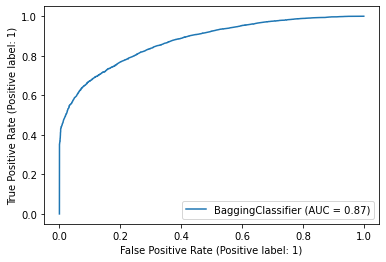

Accuracy score of Bagging-XGBoost Model : 0.7869550212814909
Precision-Recall Curve for Bagging-XGBoost Classifier


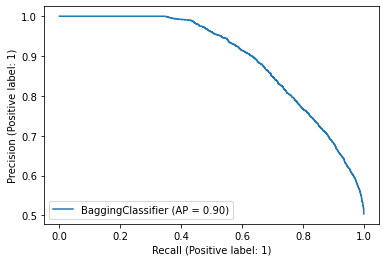

In [74]:
from sklearn.metrics import plot_roc_curve, accuracy_score, plot_precision_recall_curve

bag_xgb.fit(X_train, y)

print('====='*17)
print('ROC Curve for Bagging-XGBoost Classifier')
plot_roc_curve(bag_xgb, X_train, y)
plt.show()
print('====='*17)


y_pred_train = bag_xgb.predict(X_train)

print('====='*17)
print(f'Accuracy score of Bagging-XGBoost Model : {accuracy_score(y_pred_train, y)}')
print('====='*17)

print('====='*17)
print('Precision-Recall Curve for Bagging-XGBoost Classifier')
plot_precision_recall_curve(bag_xgb, X_train, y)
plt.show()
print('====='*17)

# STEP-VIII

# Spaceship Titanic - test data for predicting output(Transported or not Transported)


In [75]:
# Fitting the test data into the model

y_pred_test = bag_xgb.predict(X_test)

In [76]:
# checking test prediction
test_pred = pd.DataFrame(y_pred_test)
test_pred.head()

,0
0,1
1,0
2,1
3,1
4,0


In [77]:
test_pred.shape

(4277, 1)

In [78]:
sub_data['Transported'] = test_pred

print(sub_data.shape)

(4277, 2)


In [79]:
sub_data.Transported.replace(to_replace=(1 , 0), value=(True, False), inplace=True)

In [80]:
sub_data.set_index('PassengerId', inplace=True)

sub_data.head(15)

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


In [81]:
# Exporting Predicted data to CSV File

sub_data.to_csv('SubmissionSpaceshipTitanic.csv')

## -----------------------------------------------E  N  D--------------------------------------------------------